# Predicting the Survival of Titanic Passengers

## Purpose
The purpose of this notebook is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## About the data

The data has been split into two groups:

- training set (titanic.train.csv)
- test set (titanic.test.csv)

Below are the columns we have in our datasets:

- **PassengerId**: Unique ID of passenger aboard the ship
- **Survived**: 0 = No, 1 = Yes (Only in the training data)
- **Pclass**: Ticket class (1,2,3)
- **Name**: Name of the passenger
- **Sex**: male, female
- **Age** (in years)
- **SibSp**: # of siblings / spouses aboard the Titanic
- **Parch**: # of parents / children aboard the Titanic
- **Ticket**: Ticket number
- **Fare**: Passenger fare
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Import required packages

In [88]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

### Import train  data

In [89]:
train = pd.read_csv('titanic.train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Train Data Description

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
train.shape

(891, 12)

In [92]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Copy of original data

In [94]:
df_train=train.copy()

### Finding missing values in train Dataset:

In [95]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The total number of missing values

In [96]:
df_train.isnull().sum().sum()

866

Replacing missing numerical values:

In [97]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


there is two embarked missing values

In [98]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
df_train['Embarked'].fillna('S',inplace=True)

Since the column 'Cabin' had a lot of missing data, we will delete the entire column

In [100]:
df_train=df_train.drop("Cabin",axis=1)

check whether all the missing values are filled in the dataset.

In [101]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [102]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Exploring Data

<AxesSubplot:title={'center':'Bar plot of Gender'}, xlabel='Sex', ylabel='count'>

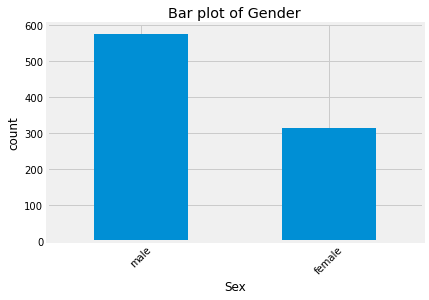

In [103]:
#Gender distribuation
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Bar plot of Gender")
vc=df_train["Sex"].value_counts()
vc.plot.bar(rot=45)

About 65% of the passengers of the Titanic were male.

Text(0.5, 1.0, 'Survival % based on genders')

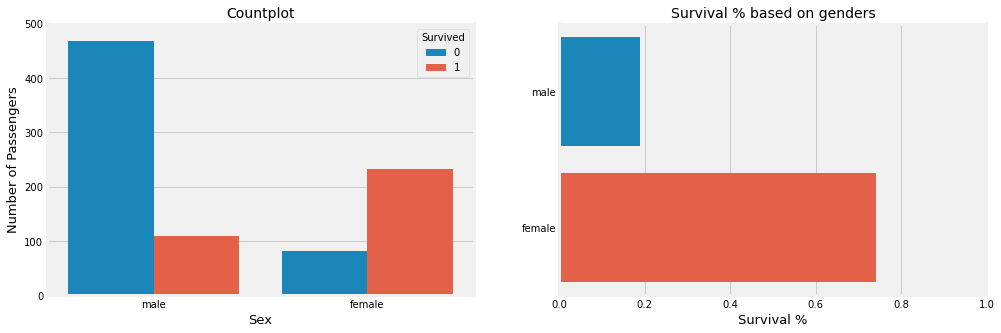

In [104]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Sex',data=df_train,hue='Survived',ax=ax1)
ax1.set_ylim([0,500])
ax1.set_xlabel('Sex',fontdict={'fontsize':13})
ax1.set_ylabel('Number of Passengers',fontdict={'fontsize':13})
ax1.set_title('Countplot',fontdict={'fontsize':14})

sns.barplot(x='Survived',y='Sex',data=df_train,errwidth=0,ax=ax2)
ax2.set_xlim([0,1])
ax2.set_xlabel('Survival %',fontdict={'fontsize':13})
ax2.set_ylabel('',fontdict={'fontsize':13})
ax2.set_title('Survival % based on genders',fontdict={'fontsize':14})

- Women had a better chance of survival than men.
- Since the percentage of female survivors was higher than the number of male survivors, we can say that Sex is an important feature to consider.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

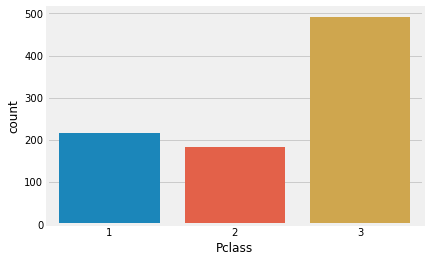

In [105]:
#Class Distribution 
sns.countplot(x='Pclass',data=df_train)



There is three distinct sections, namely class-1, class-2, class-3. The third class had the highest number of passengers.

In [106]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 

df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


63% of the first class people survived while 24% of the lower class survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

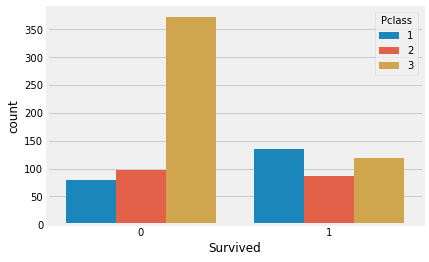

In [107]:
sns.countplot(x='Survived',hue='Pclass',data=df_train)

- From the class distribution we see that the first-class passengers survived at the highest rate.
- Passengers in higher class have higher likelihood of survival.


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

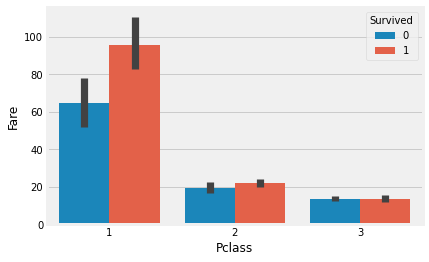

In [108]:
#The relationship between the passenger class, fare paid, and survival
sns.barplot(data=df_train, x='Pclass', y='Fare', hue ='Survived')

- The higher the passenger class, the higher is the fare.
- The higher a passenger paid, the higher would be his chances to survive

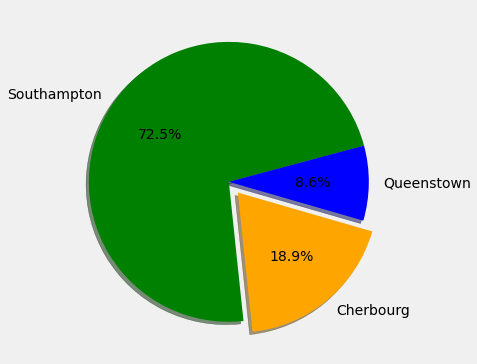

In [109]:
#Embarked distribution
Y=df_train["Embarked"].value_counts()
myexplode=(0.0,0.1,0.0)
plt.style.use("fivethirtyeight")
mylabel=['Southampton','Cherbourg','Queenstown']
colors = ['green', 'orange','blue']
plt.pie(Y,labels=mylabel,autopct="%1.1f%%",startangle=15,shadow=True,explode=myexplode,colors=colors)
plt.gcf().set_size_inches(12,6)
plt.show()

- More than 70% of the people boarded from Southampton. 
- Less than 20% boarded from Cherbourg and the rest boarded from Queenstown.

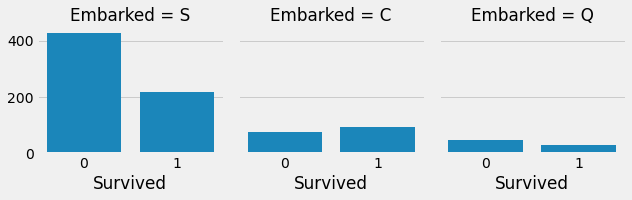

In [110]:
g=sns.FacetGrid(df_train,col='Embarked')
g.map(sns.countplot, 'Survived')

- Passengers who boarded from Cherbourg had a higher chance of survival than passengers who boarded from Southampton or Queenstown.



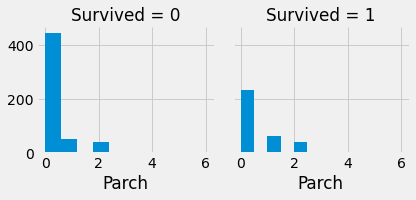

In [111]:
#Parch distribution
g=sns.FacetGrid(df_train,col='Survived')
g.map(plt.hist, 'Parch',bins=10)

- The larger the family, the lesser the chances to survive.
- People who were with 1-3 members(parents/children) had the highest survival rate.

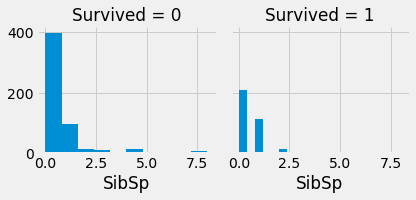

In [112]:
#SibSp distribution
g=sns.FacetGrid(df_train,col='Survived')
g.map(plt.hist, 'SibSp',bins=10)

- The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

<AxesSubplot:title={'center':'Histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

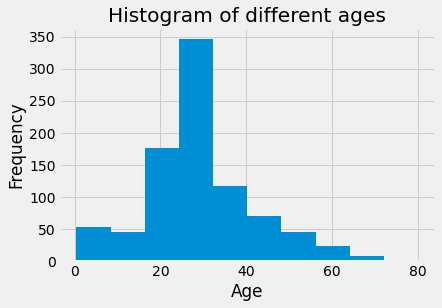

In [113]:
#Age distribution of passenger
plt.title("Histogram of different ages")
plt.xlabel("Age")
df_train["Age"].plot.hist()

- From the age distribution, we see the age concentrated around 30 years and a smaller distribution below 10 years indicating all the child population.

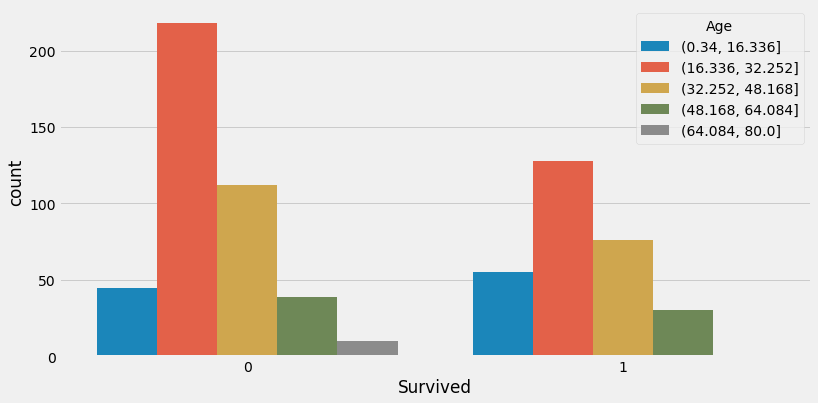

In [114]:
sns.countplot(x=train['Survived'],hue=pd.cut(train['Age'],5))
plt.style.use("fivethirtyeight")
plt.gcf().set_size_inches(12,6)

- A larger fraction of children under 16 survived than died.
- Every other age group, the number of died was higher than the number of survivors.

## Feature Engineering

#### Extract 'Title' from 'Name'

In [115]:
#Extract 'Title' from 'Name' using split method of strings
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [116]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [117]:
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
the Countess      1
Capt              1
Jonkheer          1
Sir               1
Mme               1
Ms                1
Lady              1
Name: Title, dtype: int64

In [118]:
#we will use groupby using Title and Sex to identify the genders
df_train.groupby(['Title','Sex']).count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  \
Title        Sex                                                              
Capt         male              1         1       1     1    1      1      1   
Col          male              2         2       2     2    2      2      2   
Don          male              1         1       1     1    1      1      1   
Dr           female            1         1       1     1    1      1      1   
             male              6         6       6     6    6      6      6   
Jonkheer     male              1         1       1     1    1      1      1   
Lady         female            1         1       1     1    1      1      1   
Major        male              2         2       2     2    2      2      2   
Master       male             40        40      40    40   40     40     40   
Miss         female          182       182     182   182  182    182    182   
Mlle         female            2         2       2     2    2      2      2   
Mme          female            1         1       1     1    1      1      1   
Mr           male            517       517     517   517  517    517    517   
Mrs          female          125       125     125   125  125    125    125   
Ms           female            1         1       1     1    1      1      1   
Rev          male              6         6       6     6    6      6      6   
Sir          male              1         1       1     1    1      1      1   
the Countess female            1         1       1     1    1      1      1   

                     Ticket  Fare  Embarked  
Title        Sex                             
Capt         male         1     1         1  
Col          male         2     2         2  
Don          male         1     1         1  
Dr           female       1     1         1  
             male         6     6         6  
Jonkheer     male         1     1         1  
Lady         female       1     1         1  
Major        male         2     2         2  
Master       male        40    40        40  
Miss         female     182   182       182  
Mlle         female       2     2         2  
Mme          female       1     1         1  
Mr           male       517   517       517  
Mrs          female     125   125       125  
Ms           female       1     1         1  
Rev          male         6     6         6  
Sir          male         1     1         1  
the Countess female       1     1         1

In [119]:
#Create a dictionarie with the fromkeys method and assign 'Mr' as the default value.
title_dict = {}.fromkeys(df_train['Title'].unique(),'Mr')
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mr',
 'Miss': 'Mr',
 'Master': 'Mr',
 'Don': 'Mr',
 'Rev': 'Mr',
 'Dr': 'Mr',
 'Mme': 'Mr',
 'Ms': 'Mr',
 'Major': 'Mr',
 'Lady': 'Mr',
 'Sir': 'Mr',
 'Mlle': 'Mr',
 'Col': 'Mr',
 'Capt': 'Mr',
 'the Countess': 'Mr',
 'Jonkheer': 'Mr'}

In [120]:
# Update some of the keys that don't have the value 'Mr'

title_dict.update([('Mrs','Mrs'),('Miss','Miss'),('Master','Master'),('Mme','Mrs'),('Ms','Miss'),('Lady','Mrs'),
                   ('Mlle','Mrs'),('the Countess','Mrs')])

In [121]:
df_train['Title'] = df_train['Title'].map(title_dict)

In [122]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [123]:
df_train['Title'] = df_train['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3})
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2


#### Create a new feature 'Family size' from the features 'SibSp' and 'Parch'

In [124]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.drop(['SibSp','Parch'],axis=1,inplace=True)

In [125]:
df_train['FamilySize'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

- create bins to group the family members size from alone to large.

- 0 - Alone\ 1 to 3 - Small\ 4 - 6 - Medium\ 7 and more - Large

In [126]:
df_train['FamilySize'] = pd.cut(df_train['FamilySize'],bins=[0,1,4,7,100],labels=['Alone','Small','Medium','Large'],right=False)

In [127]:
df_train['FamilySize'].unique()

['Small', 'Alone', 'Medium', 'Large']
Categories (4, object): ['Alone' < 'Small' < 'Medium' < 'Large']

In [128]:
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

df_train.reset_index(drop=True,inplace=True)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,S,2,Small
1,1,1,female,38.0,71.2833,C,3,Small
2,1,3,female,26.0,7.9250,S,1,Alone
3,1,1,female,35.0,53.1000,S,3,Small
4,0,3,male,35.0,8.0500,S,2,Alone


let's see how the FamilySize feature we extracted affects the survival.

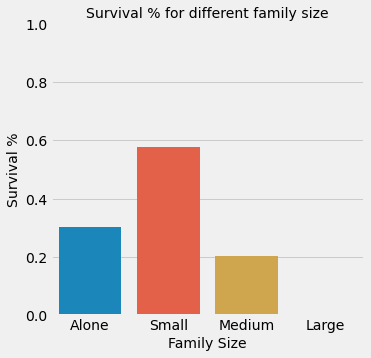

In [129]:
fig, (ax1) = plt.subplots(1,figsize=(5,5))

sns.barplot(x='FamilySize',y='Survived',data=df_train,errwidth=0,ax=ax1)
ax1.set_title('Survival % for different family size',fontdict={'fontsize':14})
ax1.set_ylim([0,1])
ax1.set_xlabel('Family Size',fontdict={'fontsize':14})
ax1.set_ylabel('Survival %',fontdict={'fontsize':14})

plt.show()


- As we can see the larger the family, the lesser the chances to survive.
- People who were with small families (1-3 members) had the highest survival rate.
- We see a low survival rate for people who were with medium families (4-6 members).


### Data Cleaning and Feature Extraction for Test data

In [130]:
test = pd.read_csv('titanic.test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [132]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [133]:
#Copy of original data
df_test=test.copy()

In [134]:
#Finding missing values
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [135]:
#Replacing missing age values
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
#Embarked feature
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [137]:
df_train['Embarked'].fillna('S',inplace=True)

#### Extracting family size feature from SibSp and Parch columns

In [138]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)
df_test['FamilySize'] = pd.cut(df_test['FamilySize'],bins=[0,1,4,7,100],labels=['Alone','Small','Medium','Large'],right=False)


In [139]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,Small


In [140]:
#Extract 'Title' from 'Name' using split method of strings
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [141]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [142]:
#Create a dictionarie with the fromkeys method and assign 'Mr' as the default value.
title_dict = {}.fromkeys(df_test['Title'].unique(),'Mr')
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mr',
 'Miss': 'Mr',
 'Master': 'Mr',
 'Ms': 'Mr',
 'Col': 'Mr',
 'Rev': 'Mr',
 'Dr': 'Mr',
 'Dona': 'Mr'}

In [143]:
# Update some of the keys that don't have the value 'Mr'

title_dict.update([('Mrs','Mrs'),('Miss','Miss'),('Master','Master'),('Mme','Mrs'),('Ms','Miss'),('Lady','Mrs'),
                   ('Mlle','Mrs'),('the Countess','Mrs')])

In [144]:
df_test['Title'] = df_test['Title'].map(title_dict)

In [145]:
df_test['Title'] = df_test['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3})
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,Alone,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,Small,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,Alone,2
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,Alone,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,Small,3


In [146]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,3,male,34.5,7.8292,Q,Alone,2
1,3,female,47.0,7.0000,S,Small,3
2,2,male,62.0,9.6875,Q,Alone,2
3,3,male,27.0,8.6625,S,Alone,2
4,3,female,22.0,12.2875,S,Small,3


### Data Preprocessing

#### Transform each categorical modality to a new feature

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy.

In [147]:
ohe_train = pd.get_dummies(df_train["Embarked"])
df_train=df_train.drop("Embarked", axis = 1) 
df_train=df_train.join(ohe_train) 
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Title,FamilySize,C,Q,S
0,0,3,male,22.0,7.2500,2,Small,0,0,1
1,1,1,female,38.0,71.2833,3,Small,1,0,0
2,1,3,female,26.0,7.9250,1,Alone,0,0,1
3,1,1,female,35.0,53.1000,3,Small,0,0,1
4,0,3,male,35.0,8.0500,2,Alone,0,0,1


In [148]:
ohe_test = pd.get_dummies(df_test["Embarked"])
df_test=df_test.drop("Embarked", axis = 1) 
df_test=df_test.join(ohe_test) 
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Title,C,Q,S
0,3,male,34.5,7.8292,Alone,2,0,1,0
1,3,female,47.0,7.0000,Small,3,0,0,1
2,2,male,62.0,9.6875,Alone,2,0,1,0
3,3,male,27.0,8.6625,Alone,2,0,0,1
4,3,female,22.0,12.2875,Small,3,0,0,1


In [149]:
ohe_train = pd.get_dummies(df_train["Sex"])
df_train=df_train.drop("Sex", axis = 1) 
df_train=df_train.join(ohe_train) 
df_train.head()

,Survived,Pclass,Age,Fare,Title,FamilySize,C,Q,S,female,male
0,0,3,22.0,7.2500,2,Small,0,0,1,0,1
1,1,1,38.0,71.2833,3,Small,1,0,0,1,0
2,1,3,26.0,7.9250,1,Alone,0,0,1,1,0
3,1,1,35.0,53.1000,3,Small,0,0,1,1,0
4,0,3,35.0,8.0500,2,Alone,0,0,1,0,1


In [150]:
ohe_test = pd.get_dummies(df_test["Sex"])
df_test=df_test.drop("Sex", axis = 1) 
df_test=df_test.join(ohe_test) 
df_test.head()

,Pclass,Age,Fare,FamilySize,Title,C,Q,S,female,male
0,3,34.5,7.8292,Alone,2,0,1,0,0,1
1,3,47.0,7.0000,Small,3,0,0,1,1,0
2,2,62.0,9.6875,Alone,2,0,1,0,0,1
3,3,27.0,8.6625,Alone,2,0,0,1,0,1
4,3,22.0,12.2875,Small,3,0,0,1,1,0


In [151]:
ohe_train = pd.get_dummies(df_train["FamilySize"])
df_train=df_train.drop("FamilySize", axis = 1) 
df_train=df_train.join(ohe_train) 
df_train.head()

,Survived,Pclass,Age,Fare,Title,C,Q,S,female,male,Alone,Small,Medium,Large
0,0,3,22.0,7.2500,2,0,0,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,3,1,0,0,1,0,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,1,0,1,0,0,0
3,1,1,35.0,53.1000,3,0,0,1,1,0,0,1,0,0
4,0,3,35.0,8.0500,2,0,0,1,0,1,1,0,0,0


In [152]:
ohe_test = pd.get_dummies(df_test["FamilySize"])
df_test=df_test.drop("FamilySize", axis = 1) 
df_test=df_test.join(ohe_test) 
df_test.head()

,Pclass,Age,Fare,Title,C,Q,S,female,male,Alone,Small,Medium,Large
0,3,34.5,7.8292,2,0,1,0,0,1,1,0,0,0
1,3,47.0,7.0000,3,0,0,1,1,0,0,1,0,0
2,2,62.0,9.6875,2,0,1,0,0,1,1,0,0,0
3,3,27.0,8.6625,2,0,0,1,0,1,1,0,0,0
4,3,22.0,12.2875,3,0,0,1,1,0,0,1,0,0


#### Normalizing  Data

In [153]:
from sklearn.preprocessing import MinMaxScaler 
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df_train[['Age']])

# Transform the data using the fitted scaler
df_train['Age_MM'] = MM_scaler.fit_transform(df_train[['Age']])

# Compare the origional and transformed column
print(df_train[['Age_MM', 'Age']].head())

     Age_MM   Age
0  0.271174  22.0
1  0.472229  38.0
2  0.321438  26.0
3  0.434531  35.0
4  0.434531  35.0


In [154]:
df_train=df_train.drop("Age", axis = 1) 
df_train.head()

,Survived,Pclass,Fare,Title,C,Q,S,female,male,Alone,Small,Medium,Large,Age_MM
0,0,3,7.2500,2,0,0,1,0,1,0,1,0,0,0.271174
1,1,1,71.2833,3,1,0,0,1,0,0,1,0,0,0.472229
2,1,3,7.9250,1,0,0,1,1,0,1,0,0,0,0.321438
3,1,1,53.1000,3,0,0,1,1,0,0,1,0,0,0.434531
4,0,3,8.0500,2,0,0,1,0,1,1,0,0,0,0.434531


In [155]:
from sklearn.preprocessing import MinMaxScaler 
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df_test[['Age']])

# Transform the data using the fitted scaler
df_test['Age_MM'] = MM_scaler.fit_transform(df_test[['Age']])

# Compare the origional and transformed column
print(df_test[['Age_MM', 'Age']].head())

     Age_MM   Age
0  0.452723  34.5
1  0.617566  47.0
2  0.815377  62.0
3  0.353818  27.0
4  0.287881  22.0


In [156]:
df_test=df_test.drop("Age", axis = 1) 
df_test.head()

,Pclass,Fare,Title,C,Q,S,female,male,Alone,Small,Medium,Large,Age_MM
0,3,7.8292,2,0,1,0,0,1,1,0,0,0,0.452723
1,3,7.0000,3,0,0,1,1,0,0,1,0,0,0.617566
2,2,9.6875,2,0,1,0,0,1,1,0,0,0,0.815377
3,3,8.6625,2,0,0,1,0,1,1,0,0,0,0.353818
4,3,12.2875,3,0,0,1,1,0,0,1,0,0,0.287881


### Modeling the Data

##### Features extraction

In [157]:
#droping the target variable "Survived"
X=df_train.drop("Survived",1)
X.head()

,Pclass,Fare,Title,C,Q,S,female,male,Alone,Small,Medium,Large,Age_MM
0,3,7.2500,2,0,0,1,0,1,0,1,0,0,0.271174
1,1,71.2833,3,1,0,0,1,0,0,1,0,0,0.472229
2,3,7.9250,1,0,0,1,1,0,1,0,0,0,0.321438
3,1,53.1000,3,0,0,1,1,0,0,1,0,0,0.434531
4,3,8.0500,2,0,0,1,0,1,1,0,0,0,0.434531


In [158]:
#save the target variable "Survived" in another dataset
y=df_train[["Survived"]]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### train_test_split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
#Splitting Data with test size of 25%
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

#### Logistic Regression Model

In [161]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [162]:
#build our logistic model
logistic_model = LogisticRegression(random_state=1)


In [163]:
#fitting training data
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [164]:
#testing model’s performance
pred_cv_logistic=logistic_model.predict(x_cv)

In [165]:
#calculating the accuracy
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 
score_logistic

78.73134328358209

#### Decision-Tree  Classifier

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
tree_model = DecisionTreeClassifier(random_state=1)

In [168]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [169]:
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
score_tree


76.11940298507463

#### Random Forest Classifier

In [170]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [171]:
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
score_forest

79.47761194029852

#### KNN Classifier

In [172]:
from sklearn.neighbors import KNeighborsClassifier


In [173]:
knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_cv)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_cv))

Acuuracy= 0.7089552238805971


Logistic Regression model gives : 78% prediction accuracy

Decision Tree model gives : 76% prediction accuracy

Random Forest model gives : 79% prediction accuracy

K-NN model gives : 71% prediction accuracy

The Random Forest model appeared to do the best for this dataset.